In [ ]:
# 美国西雅图自行车统计数据的可视化
下面介绍一个比较复杂的时间序列数据，统计自2012年以来每天经过美国西雅图弗莱蒙特桥上的
自行车的数量，数据由安装在桥东西两侧人行道的传感器采集。

In [ ]:
# -o FremontBridge.csv
# https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

In [2]:
# 读取数据集
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Objects\data\Fremont_Bridge.csv", index_col='Date', parse_dates = True)
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2015-02-24 02:00:00,3.0,3.0
2019-01-01 00:00:00,0.0,9.0
2019-01-01 01:00:00,2.0,22.0
2016-02-15 00:00:00,3.0,3.0
2019-01-01 02:00:00,1.0,11.0


In [ ]:
为了方便后面的计算，缩短数据集的列名，并新增一个Total列:

In [4]:
data.columns = ['West', 'East']
data['Total'] = data.eval('West + East')

In [6]:
data.dropna().describe()

,West,East,Total
count,62031.000000,62031.000000,62031.000000
mean,52.858603,61.794280,114.652883
std,67.738822,90.417195,145.685842
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,29.000000,30.000000,62.000000
75%,71.000000,74.000000,150.000000
max,698.000000,850.000000,1097.000000


In [ ]:
## 数据可视化
通过可视化，我们可以对数据集有一些直观的认识。先为原始数据画图，代码如下：

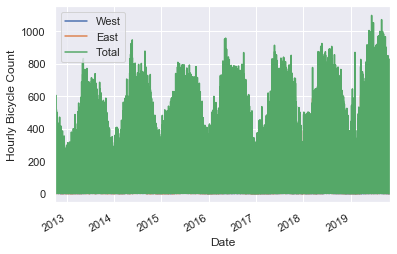

In [30]:
import seaborn; seaborn.set()
%matplotlib inline

data.plot()
plt.ylabel('Hourly Bicycle Count');
plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Objects\Pandas\images\hourly_bicycle_count.jpg")

In [ ]:
在图中显示大约25000小时的 样本数据对我们来说实在是有点多了，因此可以通过重新取样将数据转换成更大的颗粒度，比如按周累计，代码如下：

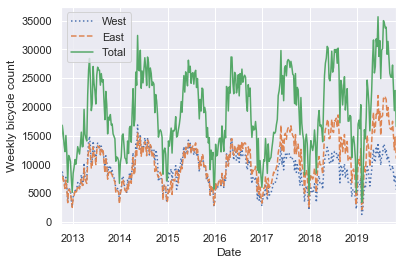

In [31]:
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count');
plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Objects\Pandas\images\bicycle.jpg")

In [ ]:
另一种对数据进行累计的简便方法是用pd.rolling_mean函数求移动平均值。下面将计算数据的30日移动平均值，并让图形在窗口居中显示，代码如下：

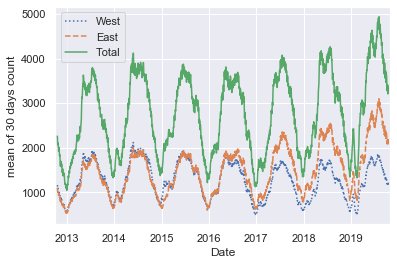

In [32]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

daily = data.resample('D').sum()
daily.rolling(30, center = True).mean().plot(style=[':', '--', '-'])
plt.ylabel('mean of 30 days count');
plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Objects\Pandas\images\bicycle2.jpg")

由于窗口太小，现在的图形还不太平滑。我们可以用另一个移动均值的方法获得更平滑的图形，例如高斯分布时间窗口。将设置窗口的宽度和窗口内高斯平滑
的宽度，代码如下：

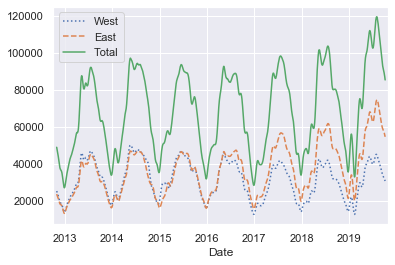

In [33]:
# 用高斯平滑方法处理每周自行车的移动均值
daily.rolling(50, center = True, win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);
plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Objects\Pandas\images\bicycles2.jpg")

## 深入挖掘数据
我们可能希望观察单日内的小时均值流量，这可以通过GroupBy,代码如下：

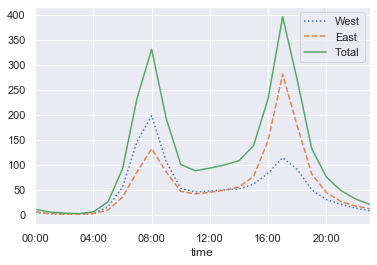

In [34]:
# 每小时的自行车流量
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks = hourly_ticks, style=[':', '--', '-']);
plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Objects\Pandas\images\bicycle3.jpg")

In [ ]:
我们可能还会对周内每天的变化产生兴趣，这时依然可以通过一个简单的groupby来实现，代码如下：

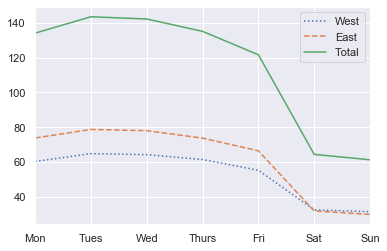

In [35]:
# 每周每天的自行车流量
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);
plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Objects\Pandas\images\bicycle4.jpg")

看到这个特征，让我们用一个复合groupby来观察一周内工作日与双休日每小时的数据。用一个标签表示双休日和工作日的不同小时：

In [25]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

In [ ]:
现在用一些Matplotlib工具画两张图

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


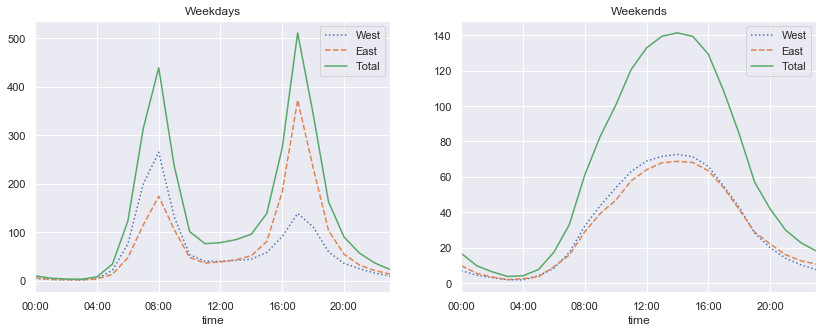

In [29]:
# 工作日与双休日每小时的自行车流量
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(1, 2, figsize = (14, 5))
by_time.ix['Weekday'].plot(ax=ax[0], title='Weekdays', xticks=hourly_ticks, style=[':', '--', '-'])
by_time.ix['Weekend'].plot(ax=ax[1], title='Weekends', xticks=hourly_ticks, style=[':', '--', '-']);
plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Objects\Pandas\images\bicycle5.jpg")